# Classification Metrics

In the last notebook we fit binary classifier to predict whether patients were diabetic or not. We used accuracy as a measure of how well the model performed, but accuracy isn't everything. In this notebook, we will look at alternatives to accuracy that can be much more useful in machine learning.

## Alternative metrics for binary classifiers

Accuracy seems like a sensible metric to evaluate (and to a certain extent it is), but you need to be careful about drawing too many conclusions from the accuracy of a classifier. Remember that it's simply a measure of how many cases were predicted correctly. Suppose only 3% of the population is diabetic. You could create a classifier that always just predicts 0, and it would be 97% accurate - but not terribly helpful in identifying patients with diabetes!

Fortunately, there are some other metrics that reveal a little more about how our model is performing. Scikit-Learn includes the ability to create a *classification report* that provides more insight than raw accuracy alone.

To get started, run the next cell to load our data and train our model like last time.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargamos los datos
diabetes = pd.read_csv('diabetes.csv')

# Separamos carateristicas y etiquetas
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

# Dividimos los datos (70-30%) para entrenamiento y prueba de nuestro modelo
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


In [3]:
# Entrenamos el modelo
from sklearn.linear_model import LogisticRegression

# Tasa de regularizacion
reg = 0.01

# Entrenamiento del modelo de regresion (con datos de entrenamiento)
model = LogisticRegression(C=1/reg,solver='liblinear').fit(X_train,y_train)

predictions = model.predict(X_test) # Predicciones del modelo entrenado
print('Etiquetas predichas: ', predictions)
print('Etiquetas actuales: ',y_test)

print('Accuracy (sensibilidad): ', accuracy_score(y_test,predictions))

Etiquetas predichas:  [0 0 0 ... 0 1 0]
Etiquetas actuales:  [0 0 1 ... 1 1 1]
Accuracy (sensibilidad):  0.7893333333333333


One of the simplest places to start is a classification report. Run the next cell to see a range of alternatives ways to assess our model

In [4]:
# Obtener el reporte de clasificacion
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



In [8]:
'''Support : ¿Cuántas instancias de esta clase hay en el conjunto de datos de prueba?'''

'Support : ¿Cuántas instancias de esta clase hay en el conjunto de datos de prueba?'

The classification report includes the following metrics for each class  (0 and 1)

> note that the header row may not line up with the values!

* *Precision*: Of the predictions the model made for this class, what proportion were correct?
* *Recall*: Out of all of the instances of this class in the test dataset, how many did the model identify?
* *F1-Score*: An average metric that takes both precision and recall into account.
* *Support*: How many instances of this class are there in the test dataset?

The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

Because this is a *binary* classification problem, the ***1*** class is considered *positive* and its precision and recall are particularly interesting - these in effect answer the questions:

- Of all the patients the model predicted are diabetic, how many are actually diabetic?
- Of all the patients that are actually diabetic, how many did the model identify?

You can retrieve these values on their own by using the **precision_score** and **recall_score** metrics in scikit-learn (which by default assume a binary classification model).

In [5]:
from sklearn.metrics import precision_score, recall_score

print("Precision en general:",precision_score(y_test, predictions)) # De todos los pacientes que en realidad son diabéticos, ¿cuántos identificó el modelo?
print("Recall en general:",recall_score(y_test, predictions))       # De todos los pacientes que el modelo predijo que son diabéticos, ¿cuántos son realmente diabéticos?

Precision en general: 0.7242472266244057
Recall en general: 0.6036988110964333


The precision and recall metrics are derived from four possible prediction outcomes:
* *True Positives*: The predicted label and the actual label are both 1.
* *False Positives*: The predicted label is 1, but the actual label is 0.
* *False Negatives*: The predicted label is 0, but the actual label is 1.
* *True Negatives*: The predicted label and the actual label are both 0.

These metrics are generally tabulated for the test set and shown together as a *confusion matrix*, which takes the following form:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

Note that the correct (*true*) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the *false* predictions if the model is any good.

In Python, you can use the **sklearn.metrics.confusion_matrix** function to find these values for a trained classifier:

[[2638  348]
 [ 600  914]]


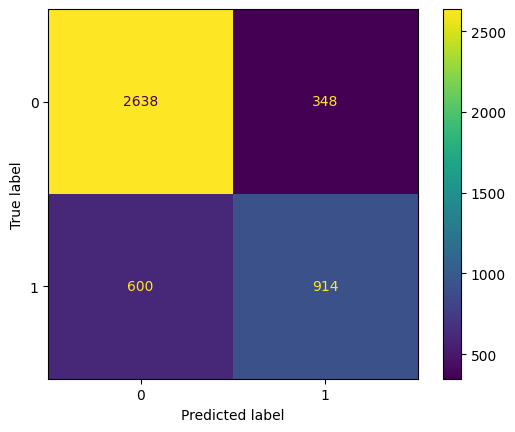

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Obtenemos la matriz de confusion 
cm = confusion_matrix(y_test, predictions)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Hasta ahora, hemos considerado las predicciones del modelo como etiquetas de clase 1 o 0. En realidad, las cosas son un poco más complejas que eso. Los algoritmos de aprendizaje automático estadístico, como la regresión logística, se basan en la probabilidad ; entonces, lo que realmente predice un clasificador binario es la probabilidad de que la etiqueta sea verdadera ( **P(y)** ) y la probabilidad de que la etiqueta sea falsa (**1 - P(y)** ). Se utiliza un valor de umbral de 0,5 para decidir si la etiqueta predicha es un 1 ( **P(y) > 0,5** ) o un 0 ( **P(y) <= 0,5** ). Puedes usar el método predict_proba para ver los pares de probabilidad para cada caso:

In [7]:
y_scores = model.predict_proba(X_test) # arroja la probabilidad de que ciertos datos sean etiquetados con cierta clasificacion
print(y_scores)

[[0.81651727 0.18348273]
 [0.96298333 0.03701667]
 [0.80862083 0.19137917]
 ...
 [0.60688422 0.39311578]
 [0.10672996 0.89327004]
 [0.63865894 0.36134106]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the *true positive rate* (which is another name for recall) and the *false positive rate* for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a *received operator characteristic (ROC) chart*, like this:

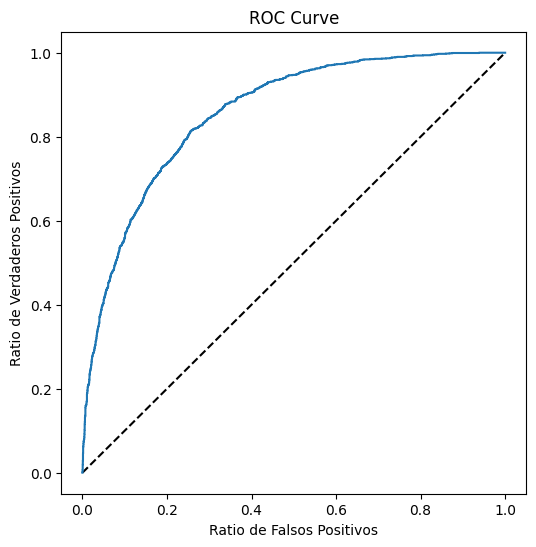

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratio de Verdaderos Positivos')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

In [9]:
from  sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_scores[:,1])

print(f'AUC: {auc}')

AUC: 0.8568482508863468


### Perform preprocessing in a pipeline

In this case, the ROC curve and its AUC indicate that the model performs better than a random guess which is not bad considering we performed very little preprocessing of the data.

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

- Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.
- Encoding categorical variables. For example, by using a *one hot encoding* technique you can create individual binary (true/false) features for each possible category value.

To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named *pipelines*. These enable us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

>**Note**: The term *pipeline* is used extensively in machine learning, often to mean very different things! In this context, we're using it to refer to pipeline objects in Scikit-Learn, but you may see it used elsewhere to mean something else.


In [24]:
# Entrenamos el modelo 

from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline                               # Canalizacion o Pipeline   
from sklearn.preprocessing import StandardScaler, OneHotEncoder     # Estandarizacion y codificacion de variables categoricas
from sklearn.linear_model import LogisticRegression                 # Modelo de regresion
import numpy as np


# Definimos los pasos de preprocesamiento para columnas numericas (normalizamos los datos para que esten en la misma escala)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Definimos el preprocesamiento para variables categoricas (codificamos la columna Age)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinar pasos de Preprocesamiento 
preprocessor = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Crear canalizacion de preprocesamiento y entrenamiento
pipeline = Pipeline(steps=[('preprocesamiento',preprocessor),
                           ('Regresor Logistico',LogisticRegression(C=1/reg, solver="liblinear"))])

# Ajuste de la canalizacion para entrenar el modelo de regresion con los datos de entrenamiento
model = pipeline.fit(X_train,(y_train))
print(model)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('Regresor Logistico',
                 LogisticRegression(C=100.0, solver='liblinear'))])


In [25]:
model

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('Regresor Logistico',
                 LogisticRegression(C=100.0, solver='liblinear'))])

The pipeline encapsulates the preprocessing steps as well as model training.

Let's use the model trained by this pipeline to predict labels for our test set, and compare the performance metrics with the basic model we created previously.

Matriz de confusion:
 [[2667  319]
 [ 406 1108]] 

Accuracy (Exactitud): 0.8388888888888889
Precision General: 0.7764540995094604
Sencibilidad General: 0.7318361955085865
AUC (Area bajo la curva):0.9202444963329531


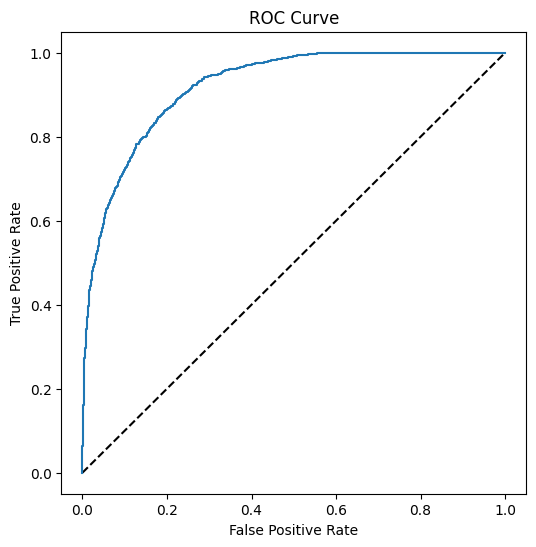

In [32]:
# Obtener las predicciones a partir del modelo de prueba
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Obtenemos las metricas de evaluacion
cm = confusion_matrix(y_test, predictions)

print('Matriz de confusion:\n',cm, '\n')
print('Accuracy (Exactitud):', accuracy_score(y_test, predictions))
print('Precision General:', precision_score(y_test, predictions))
print('Sencibilidad General:', recall_score(y_test, predictions))

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC (Area bajo la curva):' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


The results look a little better, so clearly preprocessing the data has made a difference.

### Try a different algorithm

Now let's try a different algorithm. Previously we used a logistic regression algorithm, which is a *linear* algorithm. There are many kinds of classification algorithm we could try, including:

- **Support Vector Machine algorithms**: Algorithms that define a *hyperplane* that separates classes.
- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction
- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

This time, We'll use the same preprocessing steps as before, but we'll train the model using an *ensemble* algorithm named *Random Forest* that combines the outputs of multiple random decision trees (for more details, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)).

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Let's look at the performance metrics for the new model.

Confusion Matrix:
 [[2855  131]
 [ 176 1338]] 

Accuracy: 0.9317777777777778
Overall Precision: 0.9108236895847516
Overall Recall: 0.8837516512549538

AUC: 0.9823166410222608


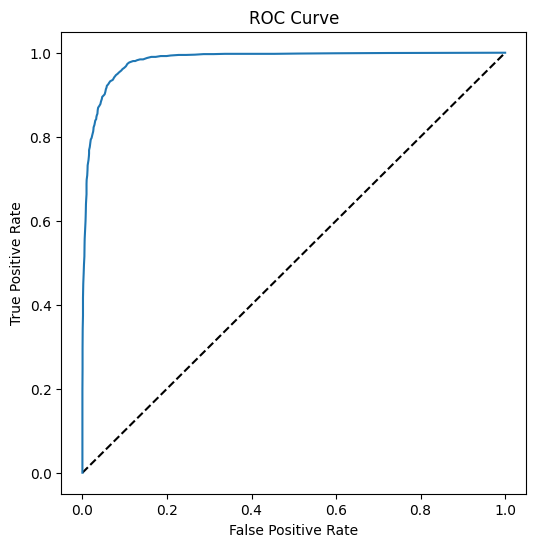

In [34]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

That looks better!


### Usar el modelo para hacer inferencias

Ahora que tenemos un modelo entrenado razonablemente útil, podemos guardarlo para usarlo más tarde para predecir etiquetas para nuevos datos:

In [35]:
import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename) # guardar modelo

['./diabetes_model.pkl']

When we have some new observations for which the label is unknown, we can load the model and use it to predict values for the unknown label:

In [36]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


## Summary

In this notebook, we looked at a range of metrics for binary classification and tried a few algorithms beyond logistic regression. We will move onto more complex classification problems in the following notebook.